# Assignment on Unsupervised Learning - Vehicle Recognition

**Data Description:** 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

**Objective:**
* The objective is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
* Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data. 

**Attribute Information:**
* All the features are geometric features extracted from the silhouette.
* All are numeric in nature.

**Learning Outcomes:**
* Exploratory Data Analysis  
* Reduce number dimensions in the dataset with minimal information loss  
* Train a model using Principle Components 

**Steps and Tasks:**
1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks) 
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points) 
3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks) 
4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks) 
5. Perform K-fold cross validation and get the cross validation score of the model (10 marks) 
6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points) 
7.  Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (10 marks) 
8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

## 1. Data Preprocessing

**Importing the Libraries and Basic EDA**

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn import model_selection

In [2]:
#load the csv file and make the data frame
vehicle_df = pd.read_csv('vehicle.csv')

In [3]:
#display the first 5 rows of dataframe
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#Shape of the dataframe
vehicle_df.shape

(846, 19)

In [5]:
#display the information of dataframe
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**Observation:** It can be seen that except 'class' column all columns are numeric and there are null values in some columns. "Class" column is the target column.

In [6]:
#display in each column how many null values are there
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**Observation:** From above we can see that max null values is 6 which are in two columns 'radius_ratio', 'skewness_about'.
so we have two options either we will drop those null values or we will impute those null values. Since the count is small, we will drop the null values.

In [7]:
#display 5 point summary of dataframe
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

**Dropping Missing Values**

In [8]:
#copy the dataframe to another dataframe and drop null/missing values from the newly created dataframe
new_vehicle_df = vehicle_df.copy()

so now we have new dataframe called new_vehicle_df and we will make changes in this new dataframe.

In [9]:
#display the first 5 rows of new dataframe
new_vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [10]:
#drop the null vaues from the new dataframe
new_vehicle_df.dropna(axis=0,inplace=True)

In [11]:
#now we will see what is the shape of dataframe
print("After dropping missing values shape of dataframe:",new_vehicle_df.shape)

After dropping missing values shape of dataframe: (813, 19)


In [12]:
#display 5 point summary of new dataframe
new_vehicle_df.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

## 2. Understanding the attributes

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


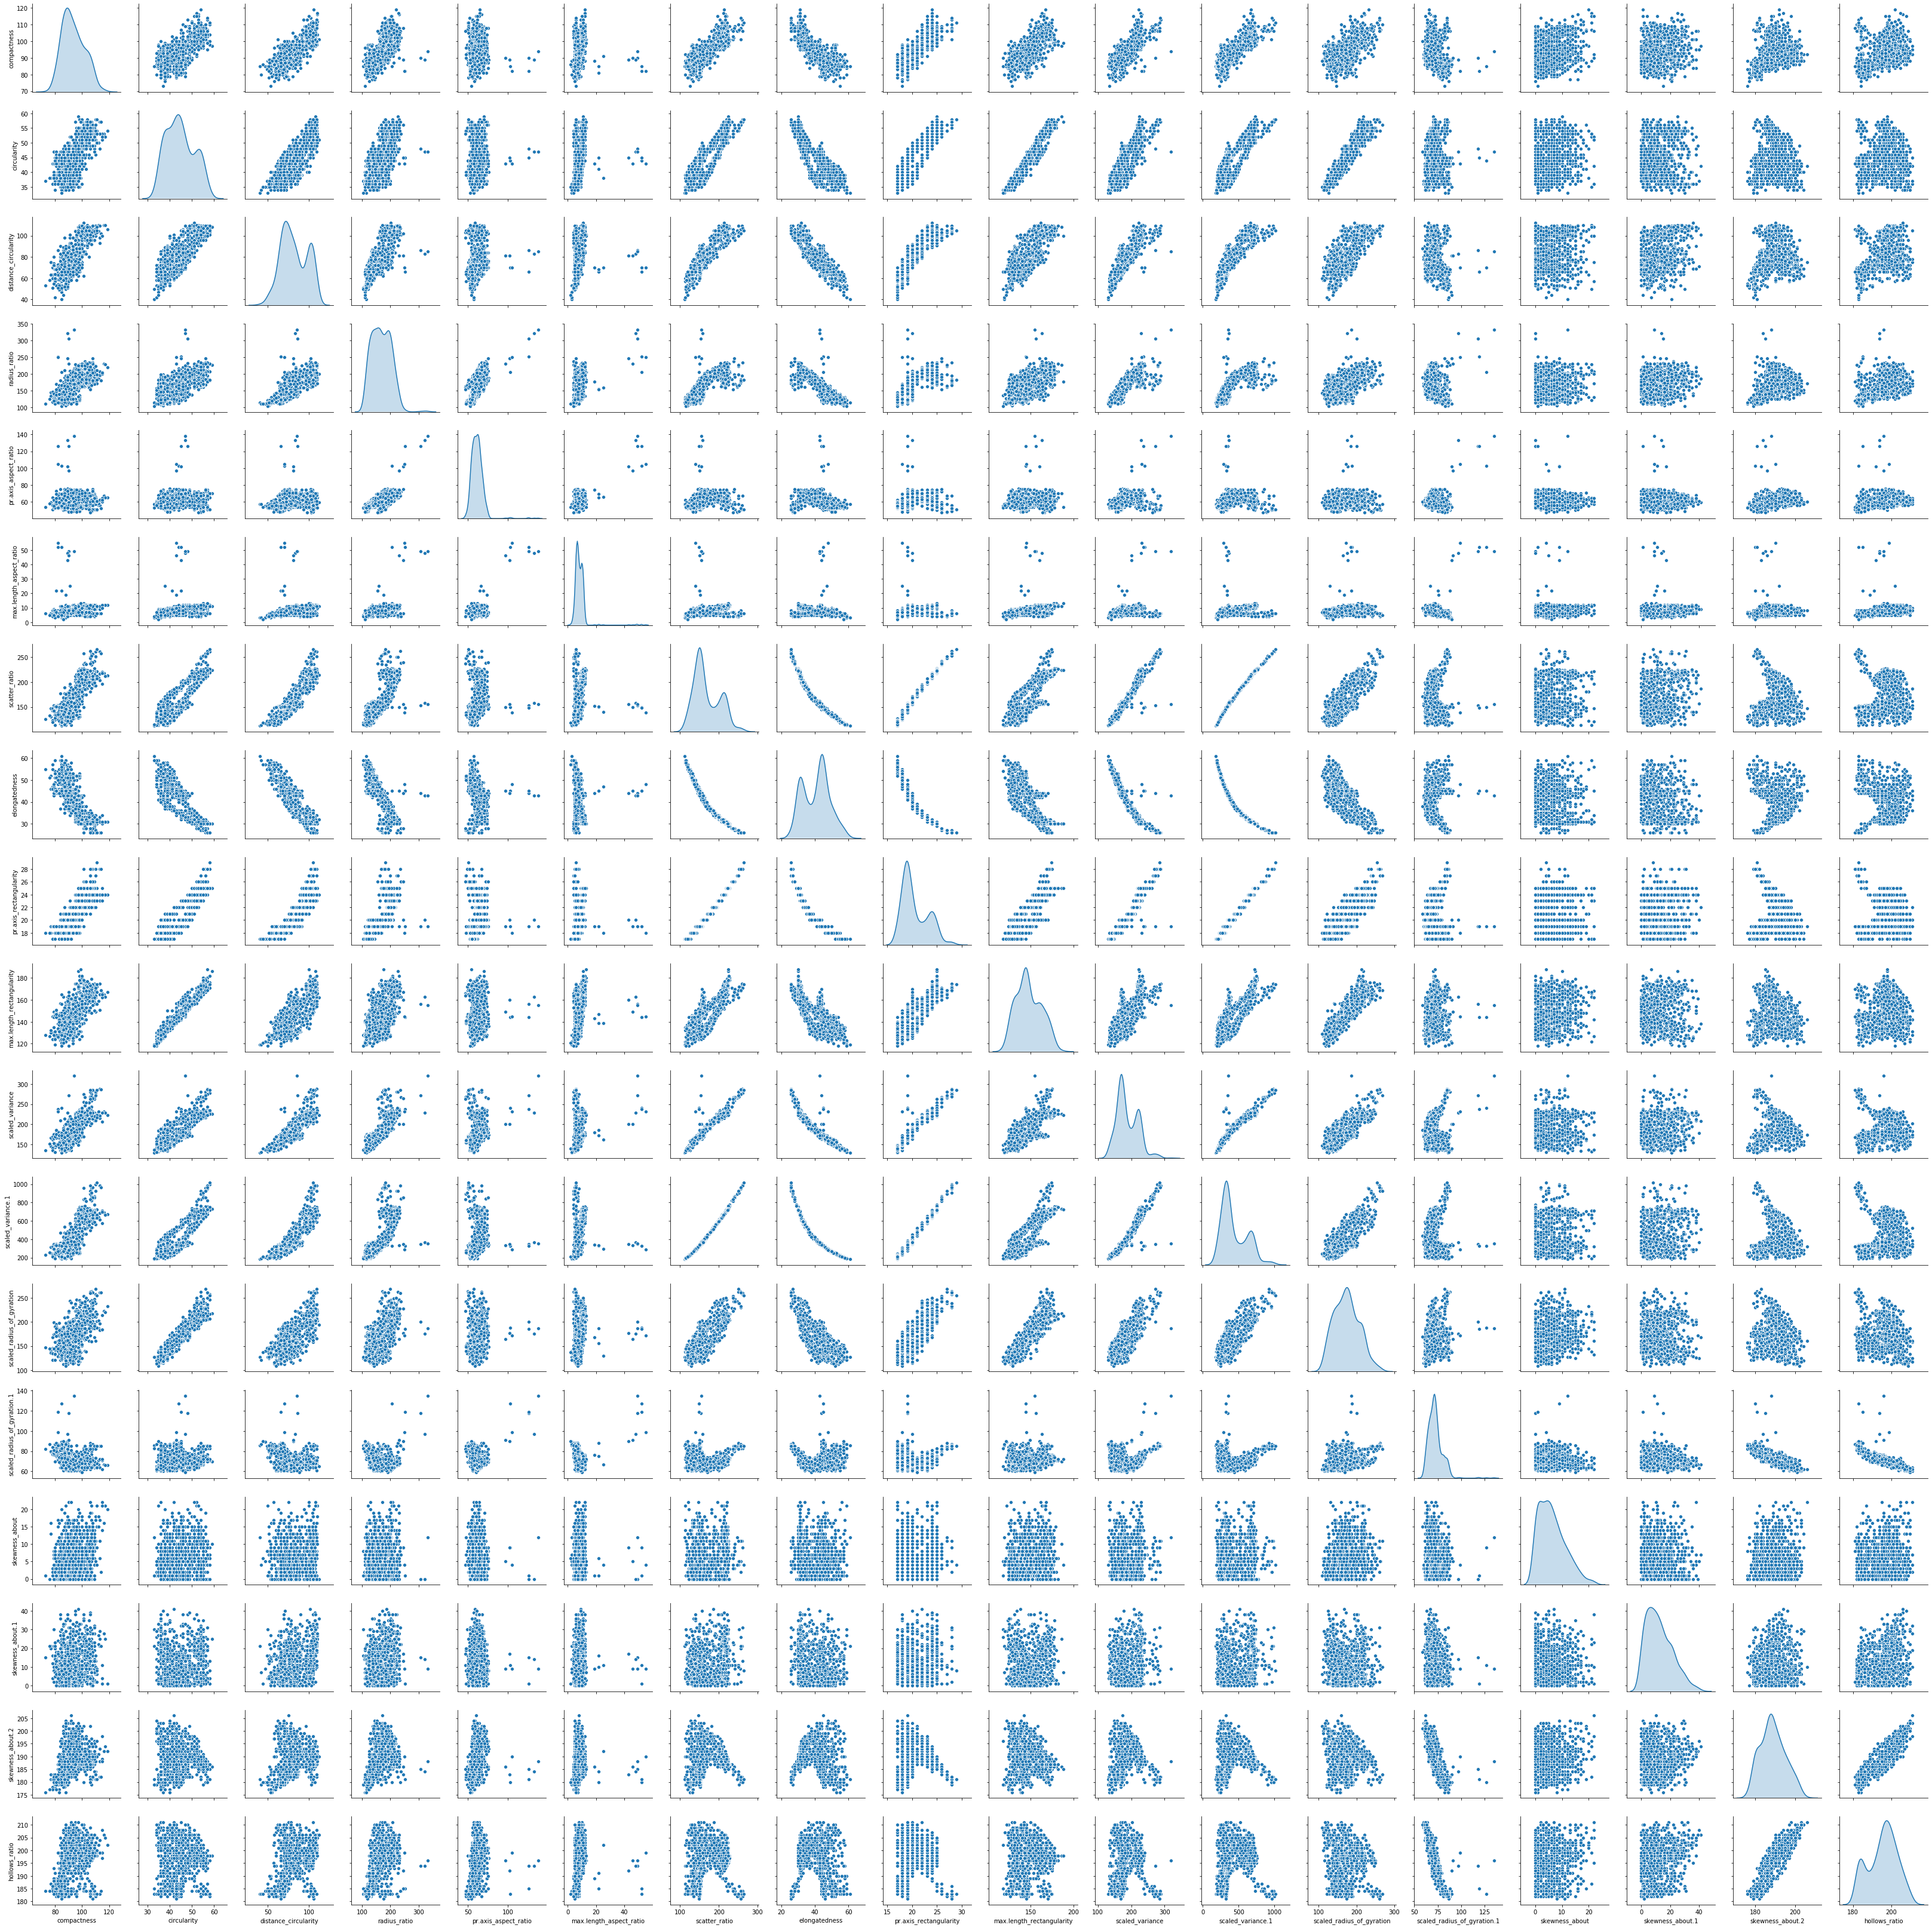

In [13]:
sns.pairplot(vehicle_df,diag_kind='kde')

**Observation:** From above pair plots we can see that many columns are correlated and many columns have long tail so that is the indication of outliers. With the help of correlation matrix and heat map, we will get more information on the strength of correlation between the attributes. Using box plots, we would check for outliers.

### Univariate Analysis

Text(0.5, 1.0, 'Box Plot')

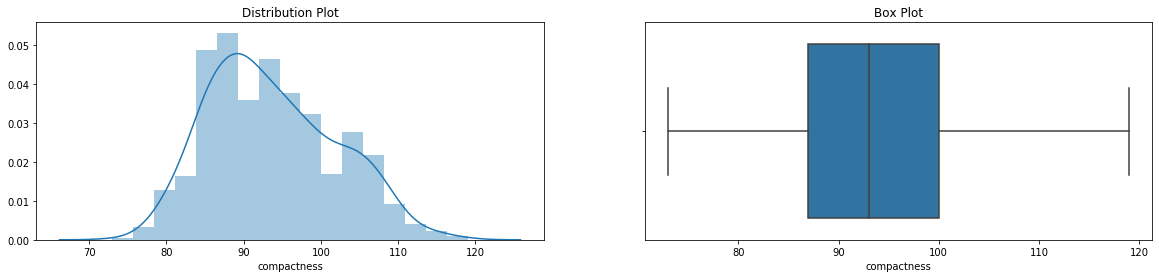

In [14]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in compactness column and it's looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

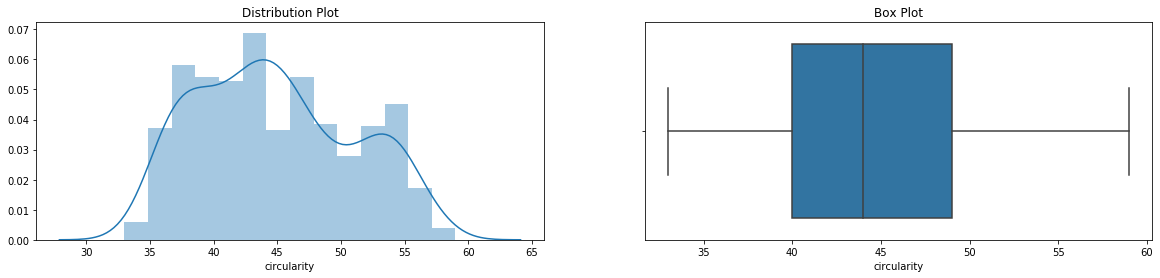

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in circularity column and it's looks like normally distributed

Text(0.5, 1.0, 'Box Plot')

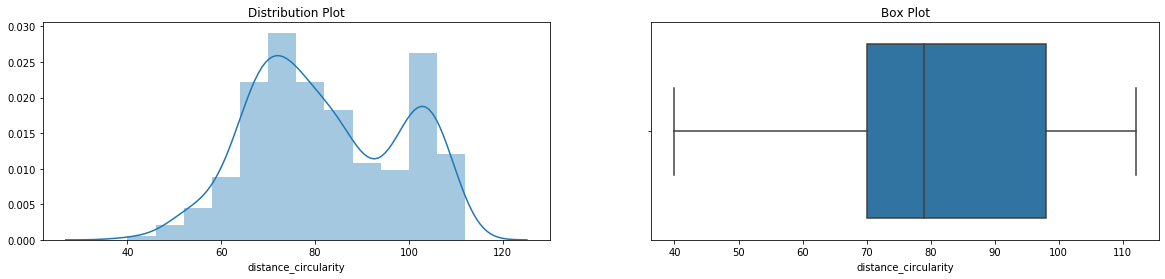

In [16]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

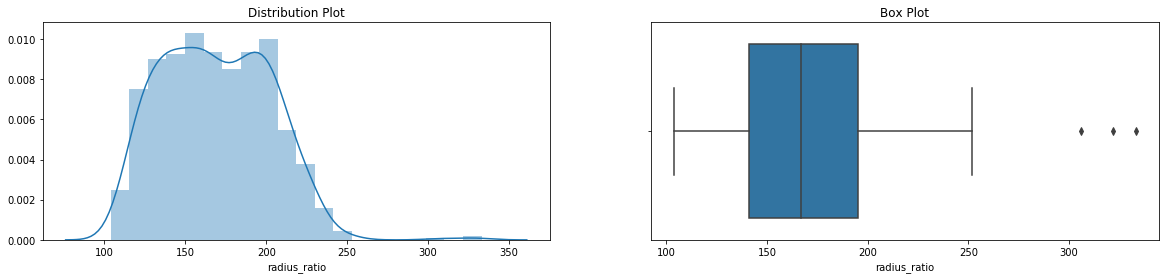

In [17]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)

In [18]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(new_vehicle_df['radius_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['radius_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['radius_ratio'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",new_vehicle_df['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",new_vehicle_df[new_vehicle_df['radius_ratio']>276]['radius_ratio'].shape[0])

Quartile1:: 141.0
Quartile2:: 167.0
Quartile3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

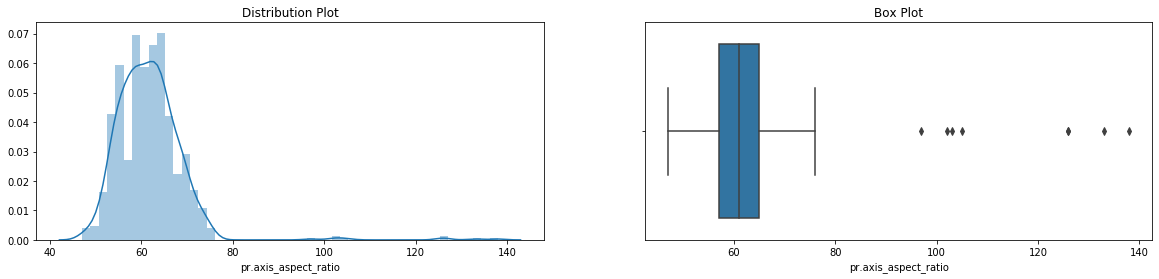

In [19]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median)

In [20]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",new_vehicle_df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartile1:: 57.0
Quartile2:: 61.0
Quartile3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

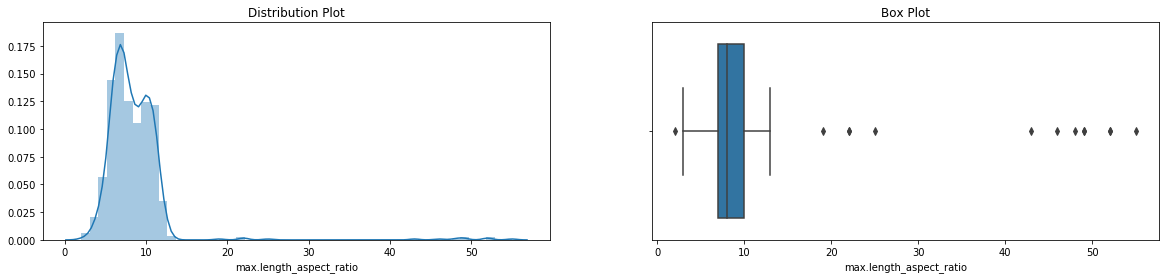

In [21]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)

In [22]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",new_vehicle_df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",new_vehicle_df['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartile1:: 7.0
Quartile2:: 8.0
Quartile3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

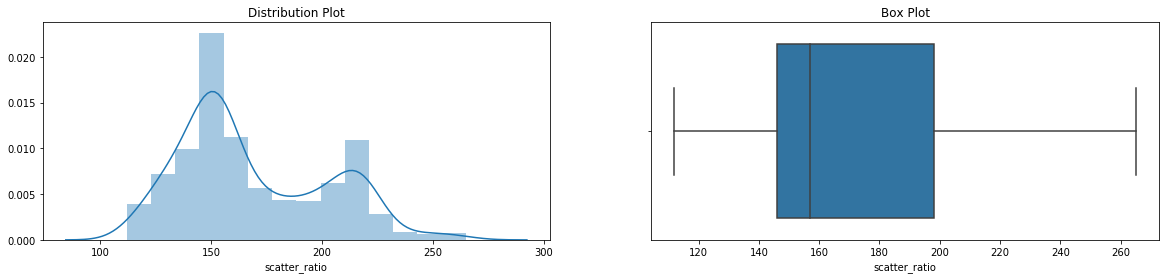

In [23]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median) 

Text(0.5, 1.0, 'Box Plot')

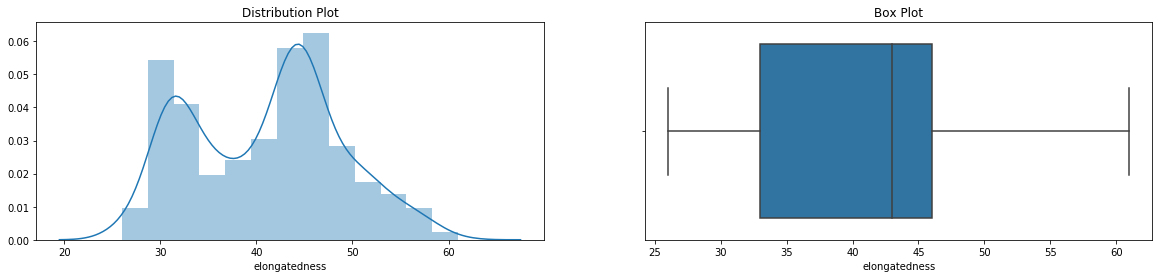

In [24]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median) 

Text(0.5, 1.0, 'Box Plot')

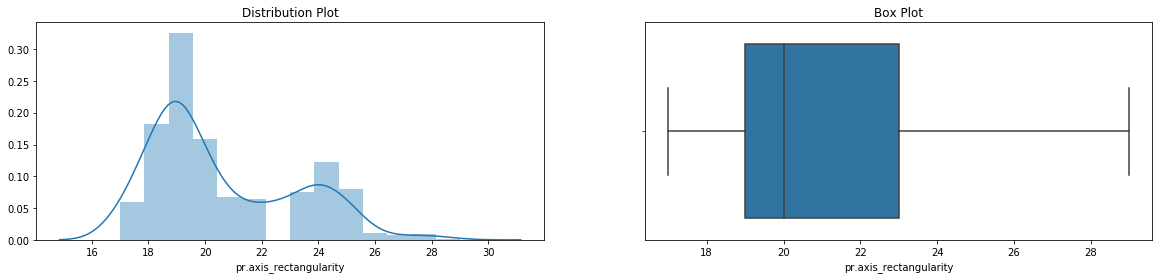

In [25]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

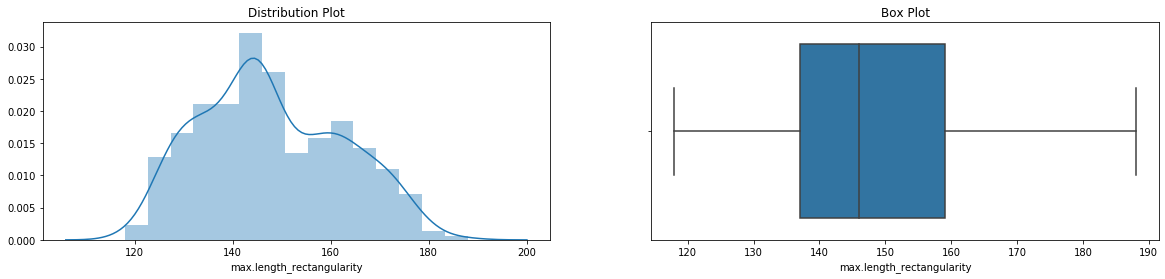

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

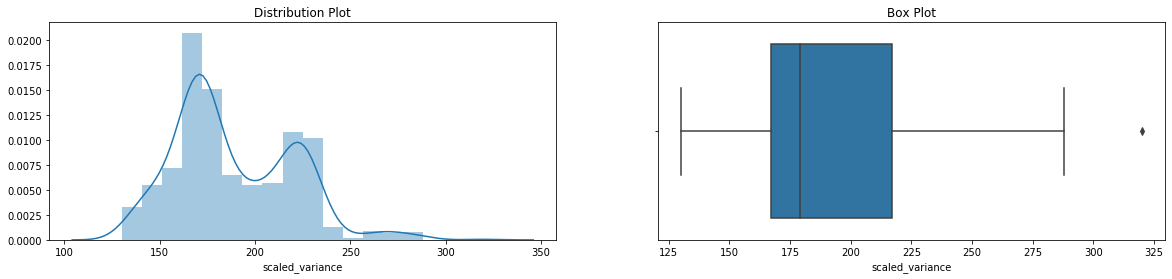

In [27]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [28]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(new_vehicle_df['scaled_variance'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",new_vehicle_df['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",new_vehicle_df[new_vehicle_df['scaled_variance']>292]['scaled_variance'].shape[0])

Quartile1:: 167.0
Quartile2:: 179.0
Quartile3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

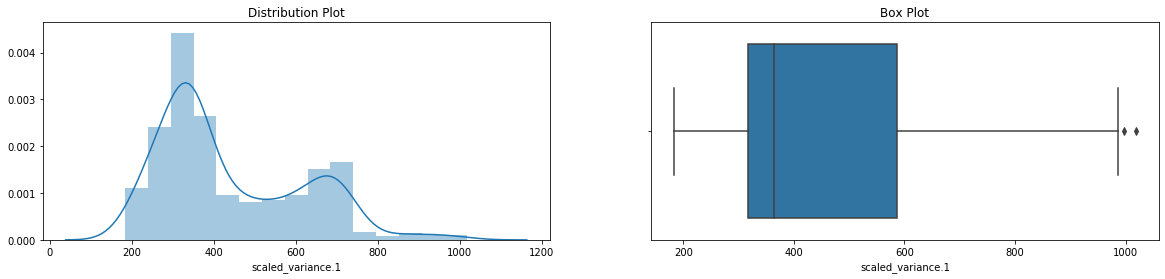

In [29]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [30]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(new_vehicle_df['scaled_variance.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance.1'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",new_vehicle_df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",new_vehicle_df[new_vehicle_df['scaled_variance.1']>988]['scaled_variance.1'].shape[0])

Quartile1:: 318.0
Quartile2:: 364.0
Quartile3:: 586.0
Inter Quartie Range:: 268.0
scaled_variance.1 above 988.0 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

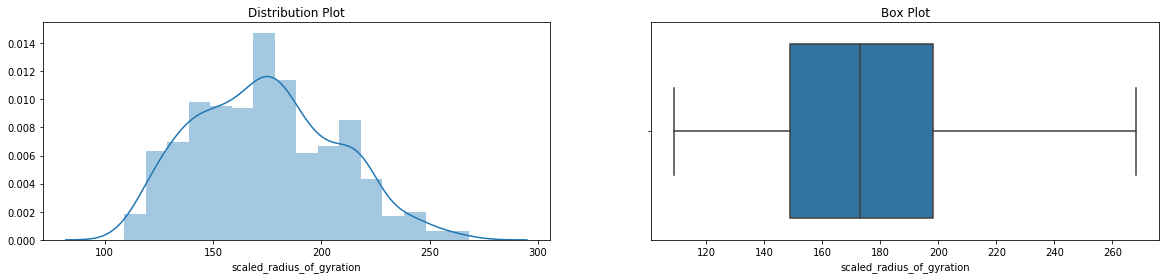

In [31]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

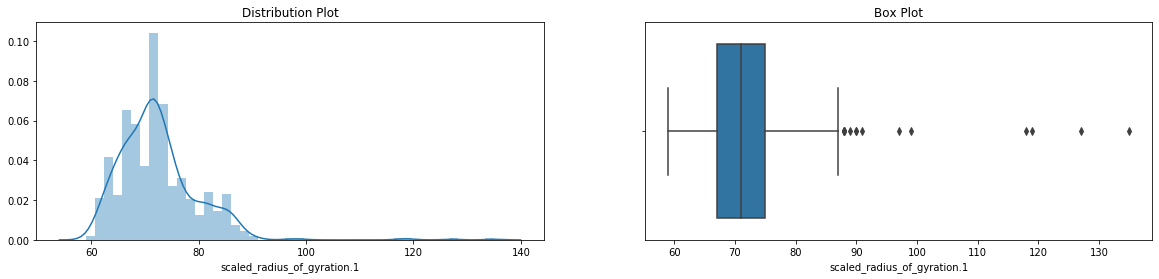

In [32]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)

In [33]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",new_vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartile1:: 67.0
Quartile2:: 71.0
Quartile3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

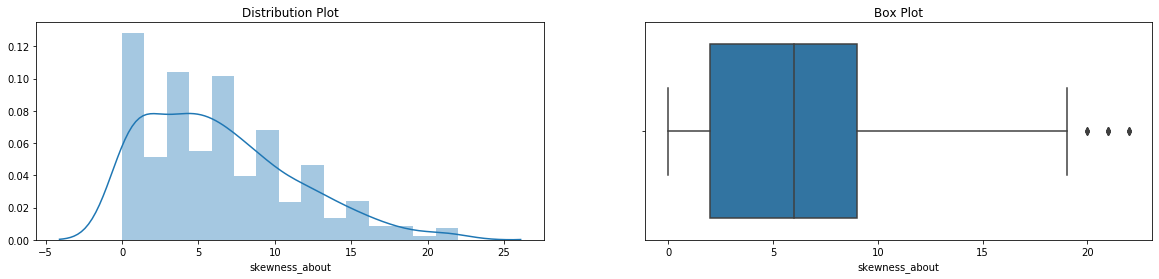

In [34]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)

In [35]:
#check how many outliers are there in skewness_about column
q1 = np.quantile(new_vehicle_df['skewness_about'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",new_vehicle_df['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",new_vehicle_df[new_vehicle_df['skewness_about']>19.5]['skewness_about'].shape[0])

Quartile1:: 2.0
Quartile2:: 6.0
Quartile3:: 9.0
Inter Quartie Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


Text(0.5, 1.0, 'Box Plot')

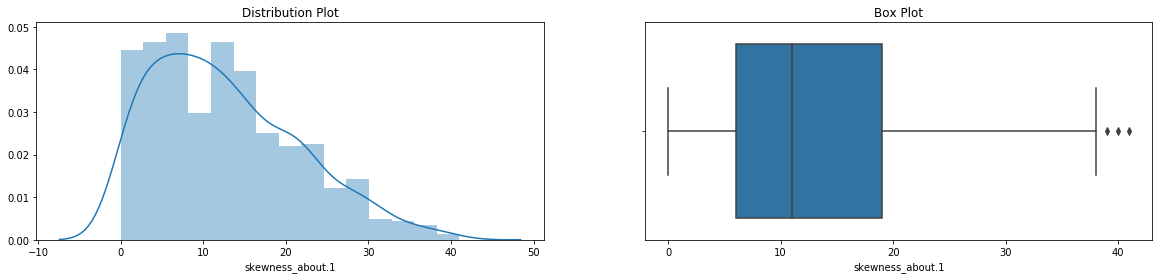

In [36]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median)

In [37]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(new_vehicle_df['skewness_about.1'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about.1'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about.1'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",new_vehicle_df['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5]['skewness_about.1'].shape[0])

Quartile1:: 6.0
Quartile2:: 11.0
Quartile3:: 19.0
Inter Quartie Range:: 13.0
skewness_about.1 above 38.5 are outliers
The Outliers in skewness_about.1 column are 3


Text(0.5, 1.0, 'Box Plot')

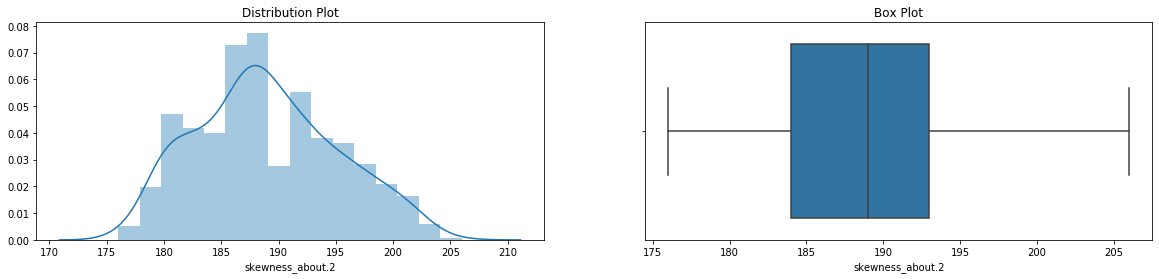

In [38]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

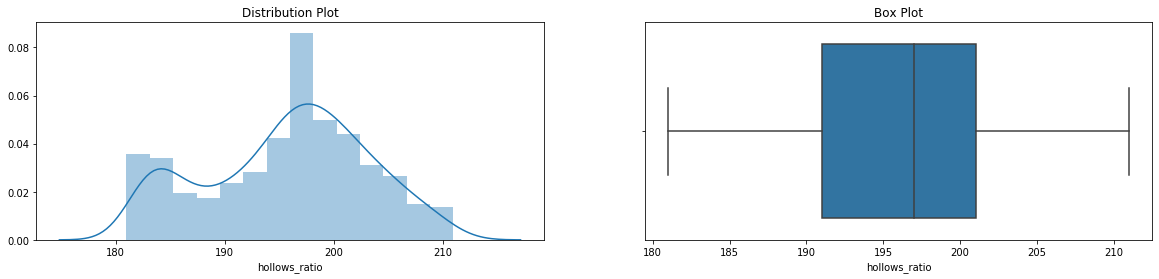

In [39]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

**Observation:** From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)

In [40]:
#display how many are car,bus,van. 
new_vehicle_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

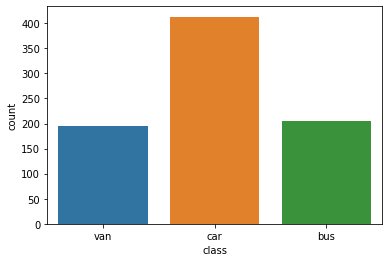

In [41]:
sns.countplot(new_vehicle_df['class'])

**Observation:** From above we can see that cars are most followed by bus and then vans. 

There are 8 columns in which outliers were found:
* radius_ratio
* pr.axis_aspect_ratio
* max.length_aspect_ratio
* scaled_variance
* scaled_variance.1
* scaled_radius_of_gyration.1
* skewness_about
* skewness_about.1

Based on the max values of above outliers column, it's looks like the outliers in above columns are natural not a typo mistake or artificial. Since we would be applying SVM on above data which is affected by outliers., we better drop these outlier values.

**Drop Outlier Values**

In [42]:
#radius_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['radius_ratio']>276].index,axis=0,inplace=True)

In [43]:
#pr.axis_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [44]:
#max.length_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [45]:
#scaled_variance column outliers
new_vehicle_df[new_vehicle_df['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

from above we can see that scaled_variance column outliers has been removed

In [46]:
#scaled_variance.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_variance.1']>988].index,axis=0,inplace=True)

In [47]:
#scaled_radius_of_gyration.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [48]:
#skewness_about column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about']>19.5].index,axis=0,inplace=True)

In [49]:
#skewness_about.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5].index,axis=0,inplace=True)

In [50]:
#now what is the shape of dataframe
new_vehicle_df.shape

(778, 19)

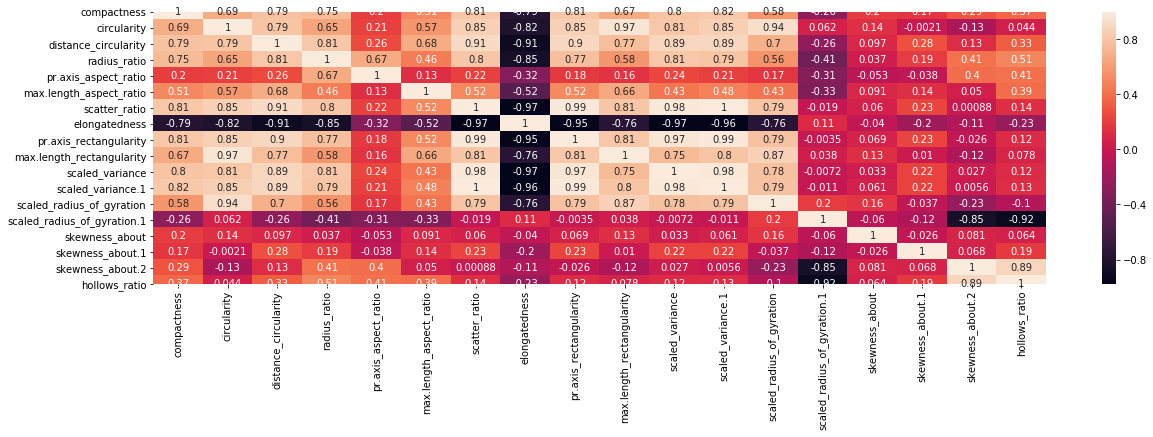

In [51]:
#find the correlation between independent variables using heat map
plt.figure(figsize=(20,5))
sns.heatmap(new_vehicle_df.corr(),annot=True)

**Obervation:** The objective is to reocgnize whether an object is a van or bus or car based on some input features. The main assumption is there is little or no multicollinearity between the features. If two features is highly correlated then there is no use in using both features.in that case, we can drop one feature. From the above correlation matrix we can see that there are many features which are highly correlated. If we see carefully then scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there which having more than 0.9 correlation. So we will drop those columns whose correlation is +-0.9 or above. There are 8 such columns:
* max.length_rectangularity
* scaled_radius_of_gyration
* skewness_about.2
* scatter_ratio
* elongatedness
* pr.axis_rectangularity
* scaled_variance
* scaled_variance.1

## 3. Split Train and Test Data

In [52]:
# Separate the dataframe into dependent and independent variables
new_vehicle_df_independent_attr = new_vehicle_df.drop('class',axis=1)
new_vehicle_df_dependent_attr = new_vehicle_df['class']
print("Shape of new_vehicle_df_independent_attr::",new_vehicle_df_independent_attr.shape)
print("Shape of new_vehicle_df_dependent_attr::  ",new_vehicle_df_dependent_attr.shape)

Shape of new_vehicle_df_independent_attr:: (778, 18)
Shape of new_vehicle_df_dependent_attr::   (778,)


In [53]:
# now scale the independent attribute and replace the dependent attr value with number
new_vehicle_df_independent_attr_scaled = new_vehicle_df_independent_attr.apply(zscore)
new_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [54]:
# Split the data into 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(new_vehicle_df_independent_attr,
                                                                                 new_vehicle_df_dependent_attr,
                                                                                 test_size=0.20,random_state=1)

In [55]:
# Split the Scaled data into 80:20 ratio
scaled_X_train,scaled_X_test,scaled_y_train,scaled_y_test = train_test_split(new_vehicle_df_independent_attr_scaled,
                                                                                 new_vehicle_df_dependent_attr,
                                                                                 test_size=0.20,random_state=1)

In [56]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test ",X_test.shape)
print("Shape of y_test ",y_test.shape)
print("--------------------------------------------")
print("Shape of scaled_X_train",scaled_X_train.shape)
print("Shape of scaled_y_train",scaled_y_train.shape)
print("Shape of scaled_X_test ",scaled_X_test.shape)
print("Shape of scaled_y_test ",scaled_y_test.shape)

Shape of X_train (622, 18)
Shape of y_train (622,)
Shape of X_test  (156, 18)
Shape of y_test  (156,)
--------------------------------------------
Shape of scaled_X_train (622, 18)
Shape of scaled_y_train (622,)
Shape of scaled_X_test  (156, 18)
Shape of scaled_y_test  (156,)


## 4. Support Vector Machines

In [57]:
# Building a Support Vector Machine on train data
# fitting the model in the training data set

svc_model = SVC()
svc_model.fit(X_train,y_train)

# Use score method to get accuracy of train model
SVC_train_score = svc_model.score(X_train,y_train)
print('Train Accuracy Score:', np.round((SVC_train_score),4))

# Use score method to get accuracy of test model
SVC_test_score = svc_model.score(X_test, y_test)
print('Test Accuracy Score: ', np.round((SVC_test_score),4))

Train Accuracy Score: 0.6479
Test Accuracy Score:  0.5769


In [58]:
#Predict for train set
pred_train_SVC = svc_model.predict(X_train)

#Confusion Matrix
SVC_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_SVC).T,
                            index=['Car', 'Bus', 'Van'], columns=['Car', 'Bus', 'Van'])
SVC_cm_train.index.name = "Predicted"
SVC_cm_train.columns.name = "True"
SVC_cm_train

True       Car  Bus  Van
Predicted               
Car        245   75   21
Bus          0   21    1
Van         62   60  137

In [59]:
#make predictions for test set
pred_test_SVC = svc_model.predict(X_test)

#Confusion Matrix
SVC_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_SVC).T,
                           index=['Car', 'Bus', 'Van'], columns=['Car', 'Bus', 'Van'])
SVC_cm_test.index.name = "Predicted"
SVC_cm_test.columns.name = "True"
SVC_cm_test

True       Car  Bus  Van
Predicted               
Car         63   20    2
Bus          0    3    0
Van         28   16   24

In [60]:
# summarize the fit of the model

SVC_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_SVC ), 4 )

print( 'Total Accuracy : ', SVC_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_SVC))

Total Accuracy :  0.5769


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.69      0.72        91
           1       1.00      0.08      0.14        39
           2       0.35      0.92      0.51        26

    accuracy                           0.58       156
   macro avg       0.70      0.56      0.46       156
weighted avg       0.74      0.58      0.54       156



### SVC on Scaled Data

In [61]:
# Building a Support Vector Machine on train data
# fitting the model in the training data set

svc_model = SVC()
svc_model.fit(scaled_X_train,scaled_y_train)

# Use score method to get accuracy of train model
SVC_train_score_scaled = svc_model.score(scaled_X_train,scaled_y_train)
print('Train Accuracy Score:', np.round((SVC_train_score_scaled),4))

# Use score method to get accuracy of test model
SVC_test_score_scaled = svc_model.score(scaled_X_test, scaled_y_test)
print('Test Accuracy Score: ', np.round((SVC_test_score_scaled),4))

Train Accuracy Score: 0.9839
Test Accuracy Score:  0.9615


In [62]:
#Predict for train set
pred_train_SVC_scaled = svc_model.predict(scaled_X_train)

#Confusion Matrix
SVC_cm_train_scaled = pd.DataFrame(confusion_matrix(scaled_y_train,pred_train_SVC_scaled).T,
                            index=['Car', 'Bus', 'Van'], columns=['Car', 'Bus', 'Van'])
SVC_cm_train_scaled.index.name = "Predicted"
SVC_cm_train_scaled.columns.name = "True"
SVC_cm_train_scaled

True       Car  Bus  Van
Predicted               
Car        302    0    3
Bus          2  155    1
Van          3    1  155

In [63]:
#make predictions for test set
pred_test_SVC_scaled = svc_model.predict(scaled_X_test)

#Confusion Matrix
SVC_cm_test_scaled = pd.DataFrame(confusion_matrix(scaled_y_test,pred_test_SVC_scaled).T,
                           index=['Car', 'Bus', 'Van'], columns=['Car', 'Bus', 'Van'])
SVC_cm_test_scaled.index.name = "Predicted"
SVC_cm_test_scaled.columns.name = "True"
SVC_cm_test_scaled

True       Car  Bus  Van
Predicted               
Car         87    0    1
Bus          0   38    0
Van          4    1   25

In [64]:
# summarize the fit of the model

SVC_accuracy_scaled = np.round( metrics.accuracy_score( scaled_y_test, pred_test_SVC_scaled ), 4 )

print( 'Total Accuracy : ', SVC_accuracy_scaled )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(scaled_y_test, pred_test_SVC_scaled))

Total Accuracy :  0.9615


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        91
           1       1.00      0.97      0.99        39
           2       0.83      0.96      0.89        26

    accuracy                           0.96       156
   macro avg       0.94      0.96      0.95       156
weighted avg       0.97      0.96      0.96       156



## 5. K-Fold Cross Validation of SVM Accuracy

**Cross validation for actual, unscaled data**

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC: 0.599068 (0.063485)


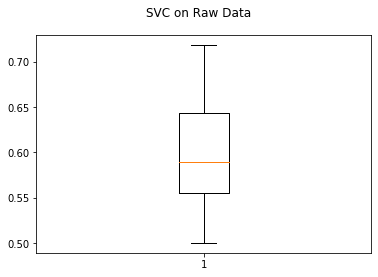

In [67]:
#k-fold cross validation for actual data
models = []
models.append(('SVC', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, new_vehicle_df_independent_attr,
                                                 new_vehicle_df_dependent_attr, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('SVC on Raw Data')
plt.boxplot(results)
plt.show()

SVC_k_fold_acc = round(cv_results.mean(),4)

**Cross validation for scaled data**

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC_scaled: 0.970446 (0.011517)


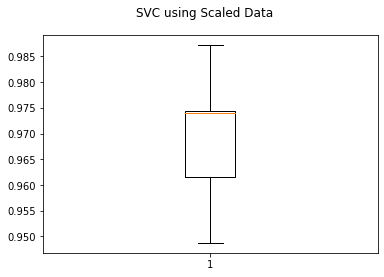

In [68]:
#k-fold cross validation for scaled data
models = []
models.append(('SVC_scaled', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, new_vehicle_df_independent_attr_scaled,
                                                 new_vehicle_df_dependent_attr, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('SVC using Scaled Data')
plt.boxplot(results)
plt.show()

SVC_k_fold_scaled_acc = round(cv_results.mean(),4)

## 6. Principal Component Analysis(PCA) 

In [69]:
#Step 1 - Create the covariance matrix using scaled data. There are 18 independent features, so cov is 18*18 matrix
cov_matrix = np.cov(new_vehicle_df_independent_attr_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00128700e+00  6.86247246e-01  7.87505293e-01  7.46771440e-01
   2.04939977e-01  5.12283067e-01  8.12881431e-01 -7.88349738e-01
   8.12905174e-01  6.73782504e-01  7.96401783e-01  8.19887792e-01
   5.76023344e-01 -2.65267720e-01  1.97487290e-01  1.69434494e-01
   2.92836011e-01  3.71157507e-01]
 [ 6.86247246e-01  1.00128700e+00  7.93336484e-01  6.46067365e-01
   2.10187939e-01  5.72687787e-01  8.55995384e-01 -8.20856804e-01
   8.55313028e-01  9.66703354e-01  8.15382274e-01  8.49756656e-01
   9.36901509e-01  6.21569802e-02  1.38644834e-01 -2.14108305e-03
  -1.26272800e-01  4.38549912e-02]
 [ 7.87505293e-01  7.93336484e-01  1.00128700e+00  8.15625667e-01
   2.57276757e-01  6.81069140e-01  9.10833561e-01 -9.11154567e-01
   9.00470612e-01  7.67926678e-01  8.91113878e-01  8.95421670e-01
   7.04373288e-01 -2.55844099e-01  9.69453477e-02  2.77271339e-01
   1.27935606e-01  3.33163683e-01]
 [ 7.46771440e-01  6.46067365e-01  8.15625667e-01  1.00128

In [70]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.70963937e-01 -8.72522599e-02  2.24781542e-02  1.34335954e-01
  -1.27262412e-01  2.84474887e-01 -2.03308464e-01 -7.58984844e-01
   3.71194634e-01  1.11648566e-01 -2.80507686e-02  1.45176198e-02
  -1.75096737e-01  9.41445824e-04 -6.28871141e-02 -3.44089197e-03
   5.02102696e-03  3.25328618e-04]
 [-2.85498616e-01  1.43599934e-01  2.12492148e-01 -2.54326664e-02
   1.10367656e-01 -6.10805701e-02  3.76582061e-01 -6.62802728e-02
   2.97764931e-02 -2.14398440e-01 -2.44699412e-02 -5.09780791e-02
  -9.42136280e-02  1.74445751e-02  2.32010855e-01 -2.04921044e-01
   3.15412207e-01  6.59858289e-01]
 [-3.00756696e-01 -4.16504206e-02 -6.81966354e-02  1.05447333e-01
   8.39191792e-02 -3.53323420e-02 -1.69573509e-01  2.99585890e-01
   2.89184360e-01 -7.41063618e-03 -7.71344834e-01  2.38952465e-01
   9.85682580e-02 -7.70093500e-03 -1.57725457e-02  3.07407404e-02
   1.28995434e-01 -4.33682793e-02]
 [-2.73648012e-01 -1.98016825e-01 -5.12261099e-02 -2.50175924e-01
  -1.39098045e-01 -

In [71]:
#Find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.7917208   73.2980841   79.94254182  86.35329026  91.27132601
  94.87153875  96.68538341  97.95474729  98.57065396  98.99657881
  99.32009222  99.54437352  99.69402634  99.81161016  99.89766878
  99.9643942   99.99803276 100.        ]


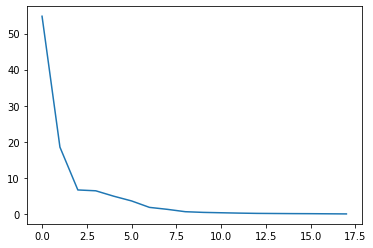

In [72]:
plt.plot(var_exp)

**Observation:** Visually we can observe that their is steep drop in variance explained with increase in number of PC's. We will proceed with 8 components here. 

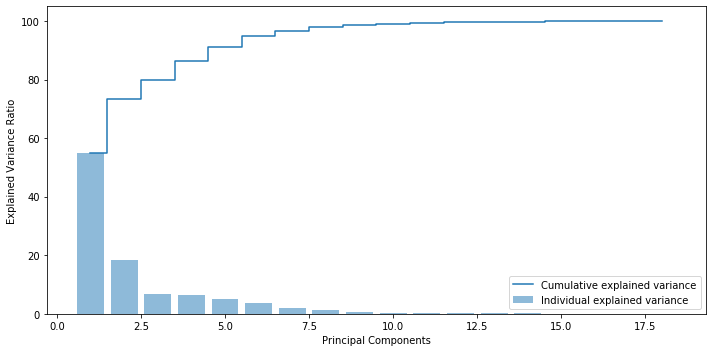

In [73]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

In [74]:
#now using PCA, with the help of above covariance matrix we will find eigen value and eigen vectors
pca_to_learn_variance = PCA(n_components=18)
pca_to_learn_variance.fit(new_vehicle_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
#display explained variance ratio
pca_to_learn_variance.explained_variance_ratio_

array([5.47917208e-01, 1.85063633e-01, 6.64445772e-02, 6.41074844e-02,
       4.91803576e-02, 3.60021274e-02, 1.81384465e-02, 1.26936388e-02,
       6.15906674e-03, 4.25924846e-03, 3.23513418e-03, 2.24281296e-03,
       1.49652817e-03, 1.17583823e-03, 8.60586176e-04, 6.67254264e-04,
       3.36385506e-04, 1.96724486e-05])

In [76]:
#display explained variance
pca_to_learn_variance.explained_variance_

array([9.87520281e+00, 3.33543258e+00, 1.19754165e+00, 1.15541983e+00,
       8.86385749e-01, 6.48872319e-01, 3.26912233e-01, 2.28779559e-01,
       1.11005882e-01, 7.67651421e-02, 5.83073605e-02, 4.04225904e-02,
       2.69721757e-02, 2.11923277e-02, 1.55104875e-02, 1.20260344e-02,
       6.06273182e-03, 3.54559807e-04])

In [77]:
#display principal components
pca_to_learn_variance.components_

array([[ 2.70963937e-01,  2.85498616e-01,  3.00756696e-01,
         2.73648012e-01,  1.02876273e-01,  1.98762043e-01,
         3.09692679e-01, -3.07017506e-01,  3.06820802e-01,
         2.74168749e-01,  3.02498907e-01,  3.07162213e-01,
         2.59825044e-01, -5.01854837e-02,  3.53690148e-02,
         6.32634323e-02,  3.55974003e-02,  8.81040107e-02],
       [-8.72522599e-02,  1.43599934e-01, -4.16504206e-02,
        -1.98016825e-01, -2.51189765e-01, -8.25042940e-02,
         7.14270483e-02, -1.09817948e-02,  8.47209207e-02,
         1.31005476e-01,  6.74747787e-02,  7.47652392e-02,
         2.10158848e-01,  5.05191356e-01, -1.54690345e-02,
        -8.14686691e-02, -5.08122400e-01, -5.06717268e-01],
       [-2.24781542e-02, -2.12492148e-01,  6.81966354e-02,
         5.12261100e-02, -1.00850129e-01, -1.68740481e-01,
         1.13838973e-01, -9.67003862e-02,  1.11506102e-01,
        -2.31363392e-01,  1.47774860e-01,  1.17721336e-01,
        -2.15281029e-01,  7.46102368e-02, -5.08187752e

Text(0, 0.5, 'Variation explained')

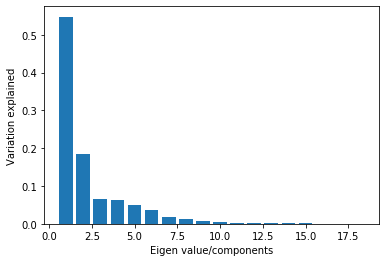

In [78]:
plt.bar(list(range(1,19)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("Eigen value/components")
plt.ylabel("Variation explained")

Text(0, 0.5, 'Cumulative of variation explained')

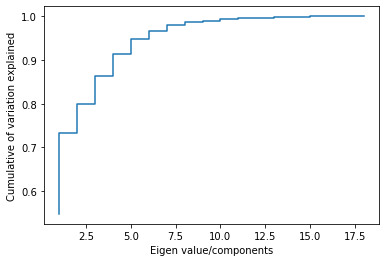

In [79]:
plt.step(list(range(1,19)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("Eigen value/components")
plt.ylabel("Cumulative of variation explained")

**Observation:** Using PCA as well, we can see that 8 dimension are able to explain 95% variance of data. So we will use first 8 principal components

### Apply PCA on 8 components and create new dataset

In [80]:
#use first 8 principal components
pca_eight_components = PCA(n_components=8)
pca_eight_components.fit(new_vehicle_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [81]:
#transform the raw data which is in 18 dimension into 8 new dimension with pca
new_vehicle_df_pca_independent_attr = pca_eight_components.transform(new_vehicle_df_independent_attr_scaled)

In [82]:
#display the shape of new_vehicle_df_pca_independent_attr
new_vehicle_df_pca_independent_attr.shape

(778, 8)

## 7. Repeat Steps 3, 4 and 5 on PCA dataset

In [83]:
# Split PCA data into Train and Test Dataset

pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(new_vehicle_df_pca_independent_attr,
                                                                 new_vehicle_df_dependent_attr,
                                                                 test_size=0.20,random_state=1)

In [84]:
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test ",pca_X_test.shape)
print("shape of pca_y_test ",pca_y_test.shape)

shape of pca_X_train (622, 8)
shape of pca_y_train (622,)
shape of pca_X_test  (156, 8)
shape of pca_y_test  (156,)


In [85]:
#now fit the model on pca data with new dimension
svc_model.fit(pca_X_train,pca_y_train)

# Use score method to get accuracy of train model
SVC_pca_train_score = svc_model.score(pca_X_train,pca_y_train)
print('Train PCA Accuracy Score:', np.round((SVC_pca_train_score),4))

# Use score method to get accuracy of test model
SVC_pca_test_score = svc_model.score(pca_X_test, pca_y_test)
print('Test PCA Accuracy Score: ', np.round((SVC_pca_test_score),4))

Train PCA Accuracy Score: 0.9711
Test PCA Accuracy Score:  0.9487


In [86]:
#Predict for train set
pred_pca_train_SVC = svc_model.predict(pca_X_train)

#Confusion Matrix
SVC_pca_cm_train = pd.DataFrame(confusion_matrix(pca_y_train,pred_pca_train_SVC).T,
                            index=['Car', 'Bus', 'Van'], columns=['Car', 'Bus', 'Van'])
SVC_pca_cm_train.index.name = "Predicted"
SVC_pca_cm_train.columns.name = "True"
SVC_pca_cm_train

True       Car  Bus  Van
Predicted               
Car        300    2    6
Bus          2  153    2
Van          5    1  151

In [87]:
#make predictions for test set
pred_pca_test_SVC = svc_model.predict(pca_X_test)

#Confusion Matrix
SVC_pca_cm_test = pd.DataFrame(confusion_matrix(pca_y_test,pred_pca_test_SVC).T,
                           index=['Car', 'Bus', 'Van'], columns=['Car', 'Bus', 'Van'])
SVC_pca_cm_test.index.name = "Predicted"
SVC_pca_cm_test.columns.name = "True"
SVC_pca_cm_test

True       Car  Bus  Van
Predicted               
Car         85    0    1
Bus          2   38    0
Van          4    1   25

In [88]:
# summarize the fit of the model

SVC_pca_accuracy = np.round( metrics.accuracy_score( pca_y_test, pred_pca_test_SVC ), 4 )

print( 'Total Accuracy : ', SVC_pca_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(pca_y_test, pred_pca_test_SVC))

Total Accuracy :  0.9487


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        91
           1       0.95      0.97      0.96        39
           2       0.83      0.96      0.89        26

    accuracy                           0.95       156
   macro avg       0.92      0.96      0.94       156
weighted avg       0.95      0.95      0.95       156



**Cross validation for PCA data**

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC on PCA data: 0.951182 (0.025540)


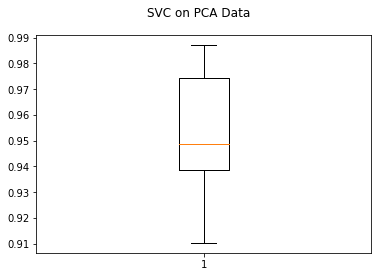

In [90]:
#k-fold cross validation for PCA data
models = []
models.append(('SVC on PCA data', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, new_vehicle_df_pca_independent_attr,
                                                 new_vehicle_df_dependent_attr, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = plt.figure()
fig.suptitle('SVC on PCA Data')
plt.boxplot(results)

SVC_k_fold_pca_acc = round(cv_results.mean(),4)

## 8. Compare Accuracy of all Models and Infer the Results

In [91]:
#display accuracy score of both models
print("Accuracy score with raw data(18 dimensions)   ",SVC_accuracy)
print("Accuracy score with scaled data(18 dimensions)",SVC_accuracy_scaled)
print("Accuracy score with pca data(8 dimensions)    ",SVC_pca_accuracy)

Accuracy score with raw data(18 dimensions)    0.5769
Accuracy score with scaled data(18 dimensions) 0.9615
Accuracy score with pca data(8 dimensions)     0.9487


**Observation:** From above we can see that by reducing 10 dimensions, we are achieving 95% accuracy.

In [92]:
#display confusion matrix of both models
print("Confusion matrix with raw data(18 dimensions)\n")
print(SVC_cm_test)
print("\n")
print("Confusion matrix with scaled data(18 dimensions)\n")
print(SVC_cm_test_scaled)
print("\n")
print("Confusion matrix with pca data(8 dimensions)\n")
print(SVC_pca_cm_test)

Confusion matrix with raw data(18 dimensions)

True       Car  Bus  Van
Predicted               
Car         63   20    2
Bus          0    3    0
Van         28   16   24


Confusion matrix with scaled data(18 dimensions)

True       Car  Bus  Van
Predicted               
Car         87    0    1
Bus          0   38    0
Van          4    1   25


Confusion matrix with pca data(8 dimensions)

True       Car  Bus  Van
Predicted               
Car         85    0    1
Bus          2   38    0
Van          4    1   25


In [93]:
#Final list of accuracy and cross validation scores for all models
resultsDf = pd.DataFrame({'Model':['SVC on Raw Data','SVC on Scaled Data', 'SVC on PCA Data'], 
                          'Training Set Accuracy': [SVC_train_score, SVC_train_score_scaled, SVC_pca_train_score],
                          'Testing Set Accuracy': [SVC_test_score, SVC_test_score_scaled, SVC_pca_test_score],
                          'Model Accuracy': [SVC_accuracy,SVC_accuracy_scaled, SVC_pca_accuracy],
                          'K-Fold Accuracy': [SVC_k_fold_acc, SVC_k_fold_scaled_acc, SVC_k_fold_pca_acc]})
resultsDf

Model  Training Set Accuracy  Testing Set Accuracy  \
0     SVC on Raw Data               0.647910              0.576923   
1  SVC on Scaled Data               0.983923              0.961538   
2     SVC on PCA Data               0.971061              0.948718   

   Model Accuracy  K-Fold Accuracy  
0          0.5769           0.5991  
1          0.9615           0.9704  
2          0.9487           0.9512

**Observation:** From the above exercise, we could see that PCA is doing a good job. **PCA has an accuracy of 95% with 8 dimensions ** while **SVC has an accuracy of 96% with scaled data and 18 dimensions**. From the above tabular column, it is seen that the accuracy of the model and k-fold cross validation give a **range of 94 - 97% accuracy** for various data and algorithms. Using PCA would be beneficial because the dimensions are reduced, but the accuracy gets traded-off. Also if we need to know which attributes/dimensions help in improving the model's accuracy, then PCA would NOT be the preferred choice since it is a black box. In such a scenario, we would opt for Support Vector Machine or use Decision Trees.